In [ ]:
#Tecnicas para la reduccion de la dimensionalidad. El objetivo es que cuando hay variables muy correlacionadas
#dejaremos dicha informacion de ambas en una.
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

gorriones = pd.read_csv('/content/gorriones.csv')
del gorriones['Unnamed: 0']
scale_vars = ['x1', 'x2','x3','x4','x5']
scaler = sklearn.preprocessing.StandardScaler() 
gorriones[scale_vars] = scaler.fit_transform(gorriones[scale_vars])

gorriones.head()


,x1,x2,x3,x4,x5,superviv
0,-0.547333,0.732373,0.179019,0.054812,-0.332785,S
1,-1.100309,-0.264468,-1.346531,-1.019498,-1.250023,S
2,-1.376796,-0.264468,-0.583756,-0.124240,-0.230870,S
3,-1.376796,-1.061941,-0.710885,-1.377602,-0.638531,S
4,-0.823821,0.333637,0.051889,0.233863,-0.536616,S


In [ ]:
#separamos las variables predictoras
variables = ['x1','x2','x3','x4','x5']
X = gorriones[variables]
y = gorriones['superviv']
y


0     S
1     S
2     S
3     S
4     S
5     S
6     S
7     S
8     S
9     S
10    S
11    S
12    S
13    S
14    S
15    S
16    S
17    S
18    S
19    S
20    S
21    N
22    N
23    N
24    N
25    N
26    N
27    N
28    N
29    N
30    N
31    N
32    N
33    N
34    N
35    N
36    N
37    N
38    N
39    N
40    N
41    N
42    N
43    N
44    N
45    N
46    N
47    N
48    N
Name: superviv, dtype: object

In [ ]:
#calculamos la matriz de covarianza
import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
          x1        x2        x3        x4        x5
x1  1.020833  0.750276  0.675600  0.658728  0.617731
x2  0.750276  1.020833  0.687777  0.784519  0.540035
x3  0.675600  0.687777  1.020833  0.779090  0.537234
x4  0.658728  0.784519  0.779090  1.020833  0.619288
x5  0.617731  0.540035  0.537234  0.619288  1.020833


In [ ]:
#Se realiza descomposicion propia en la matriz de covarianza

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.45179893 -0.3739091   0.42041399 -0.69047023  0.05072137]
 [-0.46168085  0.53008046 -0.54786307 -0.34054844 -0.29956355]
 [-0.45054161  0.34279226  0.60629605  0.45449265 -0.32457242]
 [-0.47073887 -0.65166652 -0.38827811  0.410935   -0.18468403]
 [-0.39767537  0.19243414 -0.06887199  0.1784558   0.87648935]]

Eigenvalues 
[3.69131123 0.16795517 0.30784813 0.39447506 0.54257708]


In [ ]:
#procedemos a eliminar los vectores propios con los valores propios más bajos,
# ya que contienen la menor información.

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


eig_pairs.sort(key=lambda x: x[0], reverse=True)
#imprimimos los valores propios de mayor a menor
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.691311226681437
0.5425770782760833
0.39447506046353503
0.3078481324986376
0.16795516874697317


In [ ]:
#Vemos cuantos componentes son los adecuados

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp
#obtenemos que las tres primeras componentes explican el 90% de la varianza.

array([ 72.31956689,  82.94964842,  90.6781394 ,  96.70944976,
       100.        ])

In [ ]:
#construimos una matriz de proyeccion con los mejores valores propios, tenemos una matriz con
#5 variables, en este caso estamos reduciendo 5 dimensiones a 2.
matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1)))

print('Matrix W:\n', matrix_w)


Matrix W:
 [[-0.45179893  0.05072137]
 [-0.46168085 -0.29956355]
 [-0.45054161 -0.32457242]
 [-0.47073887 -0.18468403]
 [-0.39767537  0.87648935]]


In [ ]:
Y = X.dot(matrix_w)

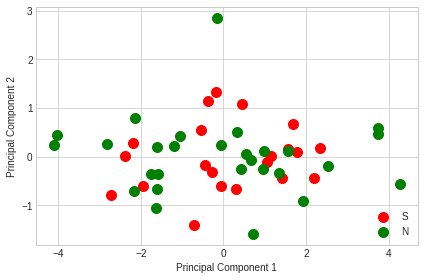

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('S', 'N'), ('red', 'green')):
        plt.scatter(Y.values[y==lab,0], Y.values[y==lab,1], label=lab, c=col,
                    s=100)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()